In [1]:

#Import data and related libralies
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab 
import xgboost
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hr.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# insert column
target = df['left']
df1 = df.insert(len(df.columns),'target', target)

In [6]:
#drop column
df1 = df.drop(labels=['left'],axis=1)
#Changing the 'sales' column name into 'Department'
df1 = df1.rename({"sale":"Department"}, axis=1)
df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,target
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   target                 14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
#Data processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  target                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,target
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Data contain duplicated value that needed to remove before analyze
df.duplicated().sum()


3008

In [11]:
df.drop_duplicates(inplace = True)

In [12]:

#Check if there is any NaN or Null value
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
target                   0
dtype: int64


In [13]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Department                object
salary                    object
target                     int64
dtype: object

In [14]:
#Changing the 'sales' column name into 'Department'
df1 = df1.rename({"sale":"Department"}, axis=1)
df1.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,target
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1


In [15]:
#Convert categorical features 'salary' and 'sales' into numerical features using dummy variables
dummy_variables = pd.get_dummies(df1[['Department','salary']])
dummy_variables.head(5)

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [16]:
#Add the dummy_variables columns into the dataframe
df2 = pd.DataFrame.join(df1, dummy_variables)
df2.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,target,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,sales,low,1,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,sales,medium,1,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1,...,0,0,0,0,1,0,0,0,0,1


In [17]:
df1[['salary','Department']].describe()

,salary,Department
count,14999,14999
unique,3,10
top,low,sales
freq,7316,4140


0    10000
1     1991
Name: target, dtype: int64


<Axes: >

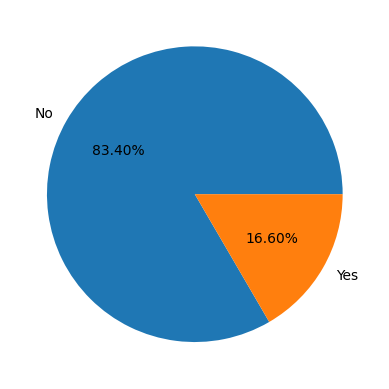

In [18]:
#Pie chart - checking whether the outcome data is balanced
print(df.target.value_counts())
df.target.value_counts().plot.pie(labels=("No","Yes"),autopct="%.2f%%", label="")

In [19]:
'''The pie chart shows that there is unbalanced classes in which out of 11991 employees, 83.40% employees leave the   company and 16.60% employees stay at the company. '''

'The pie chart shows that there is unbalanced classes in which out of 11991 employees, 83.40% employees leave the   company and 16.60% employees stay at the company. '

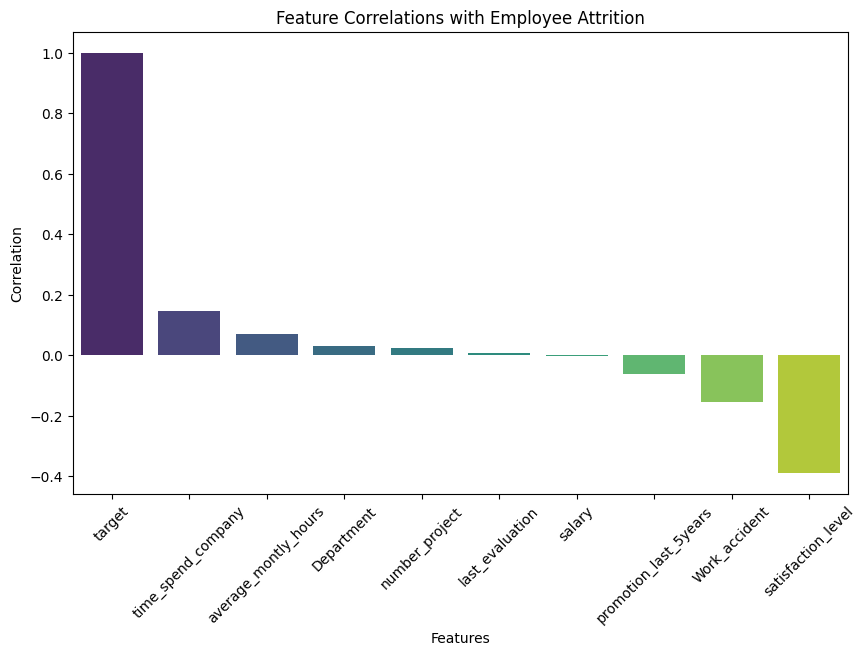

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



# Encode categorical variables
le = LabelEncoder()
df1['Department'] = le.fit_transform(df1['Department'])
df1['salary'] = le.fit_transform(df1['salary'])

# Calculate the correlation between each feature and the target variable
correlations = df1.corr()['target'].sort_values(ascending=False)

# Visualize the correlations using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.title("Feature Correlations with Employee Attrition")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='salary'>

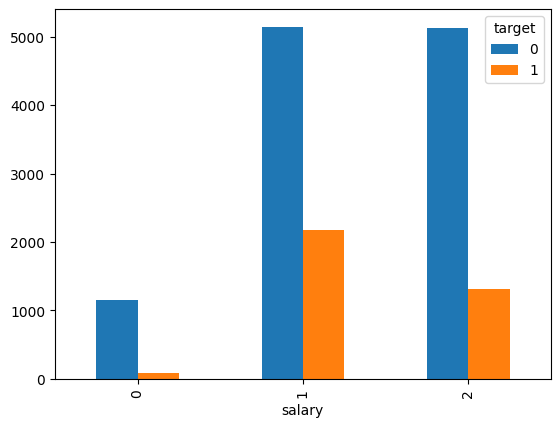

In [21]:
# Bar chart 
pd.crosstab(df1.salary, df1.target).plot(kind = 'bar')

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



# Encode categorical variables
le = LabelEncoder()
df1['Department'] = le.fit_transform(df1['Department'])
df1['salary'] = le.fit_transform(df1['salary'])

# Create a train-test split
X = df1.drop( 'average_montly_hours', axis=1)
y = df1['average_montly_hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant to the features for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model.summary())

# Calculate predictions on the test set
y_pred = model.predict(X_test)


                             OLS Regression Results                             
Dep. Variable:     average_montly_hours   R-squared:                       0.222
Model:                              OLS   Adj. R-squared:                  0.222
Method:                   Least Squares   F-statistic:                     333.1
Date:                  Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                          13:47:48   Log-Likelihood:                -54626.
No. Observations:                 10499   AIC:                         1.093e+05
Df Residuals:                     10489   BIC:                         1.093e+05
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

In [32]:
'''Since there exists few outliers, thus central tendency measures of either mean, mode or median does not effect much towards the average value.'''

'Since there exists few outliers, thus central tendency measures of either mean, mode or median does not effect much towards the average value.'

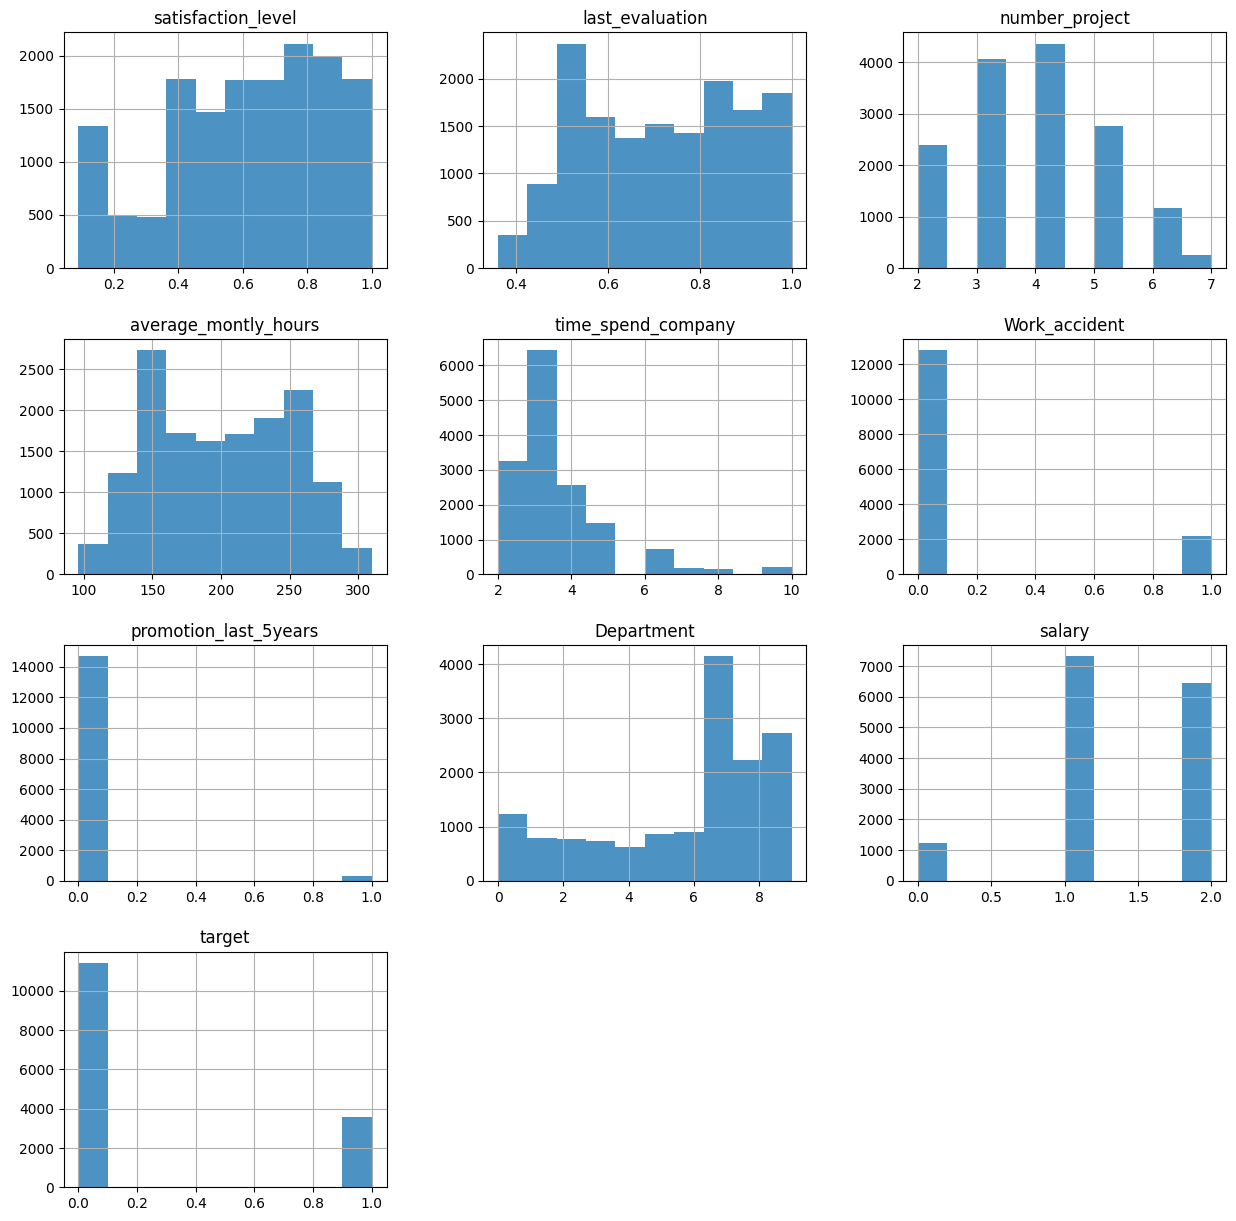

In [33]:
#Histogram
df1.hist(alpha=0.8,figsize=(15,15))
plt.show()

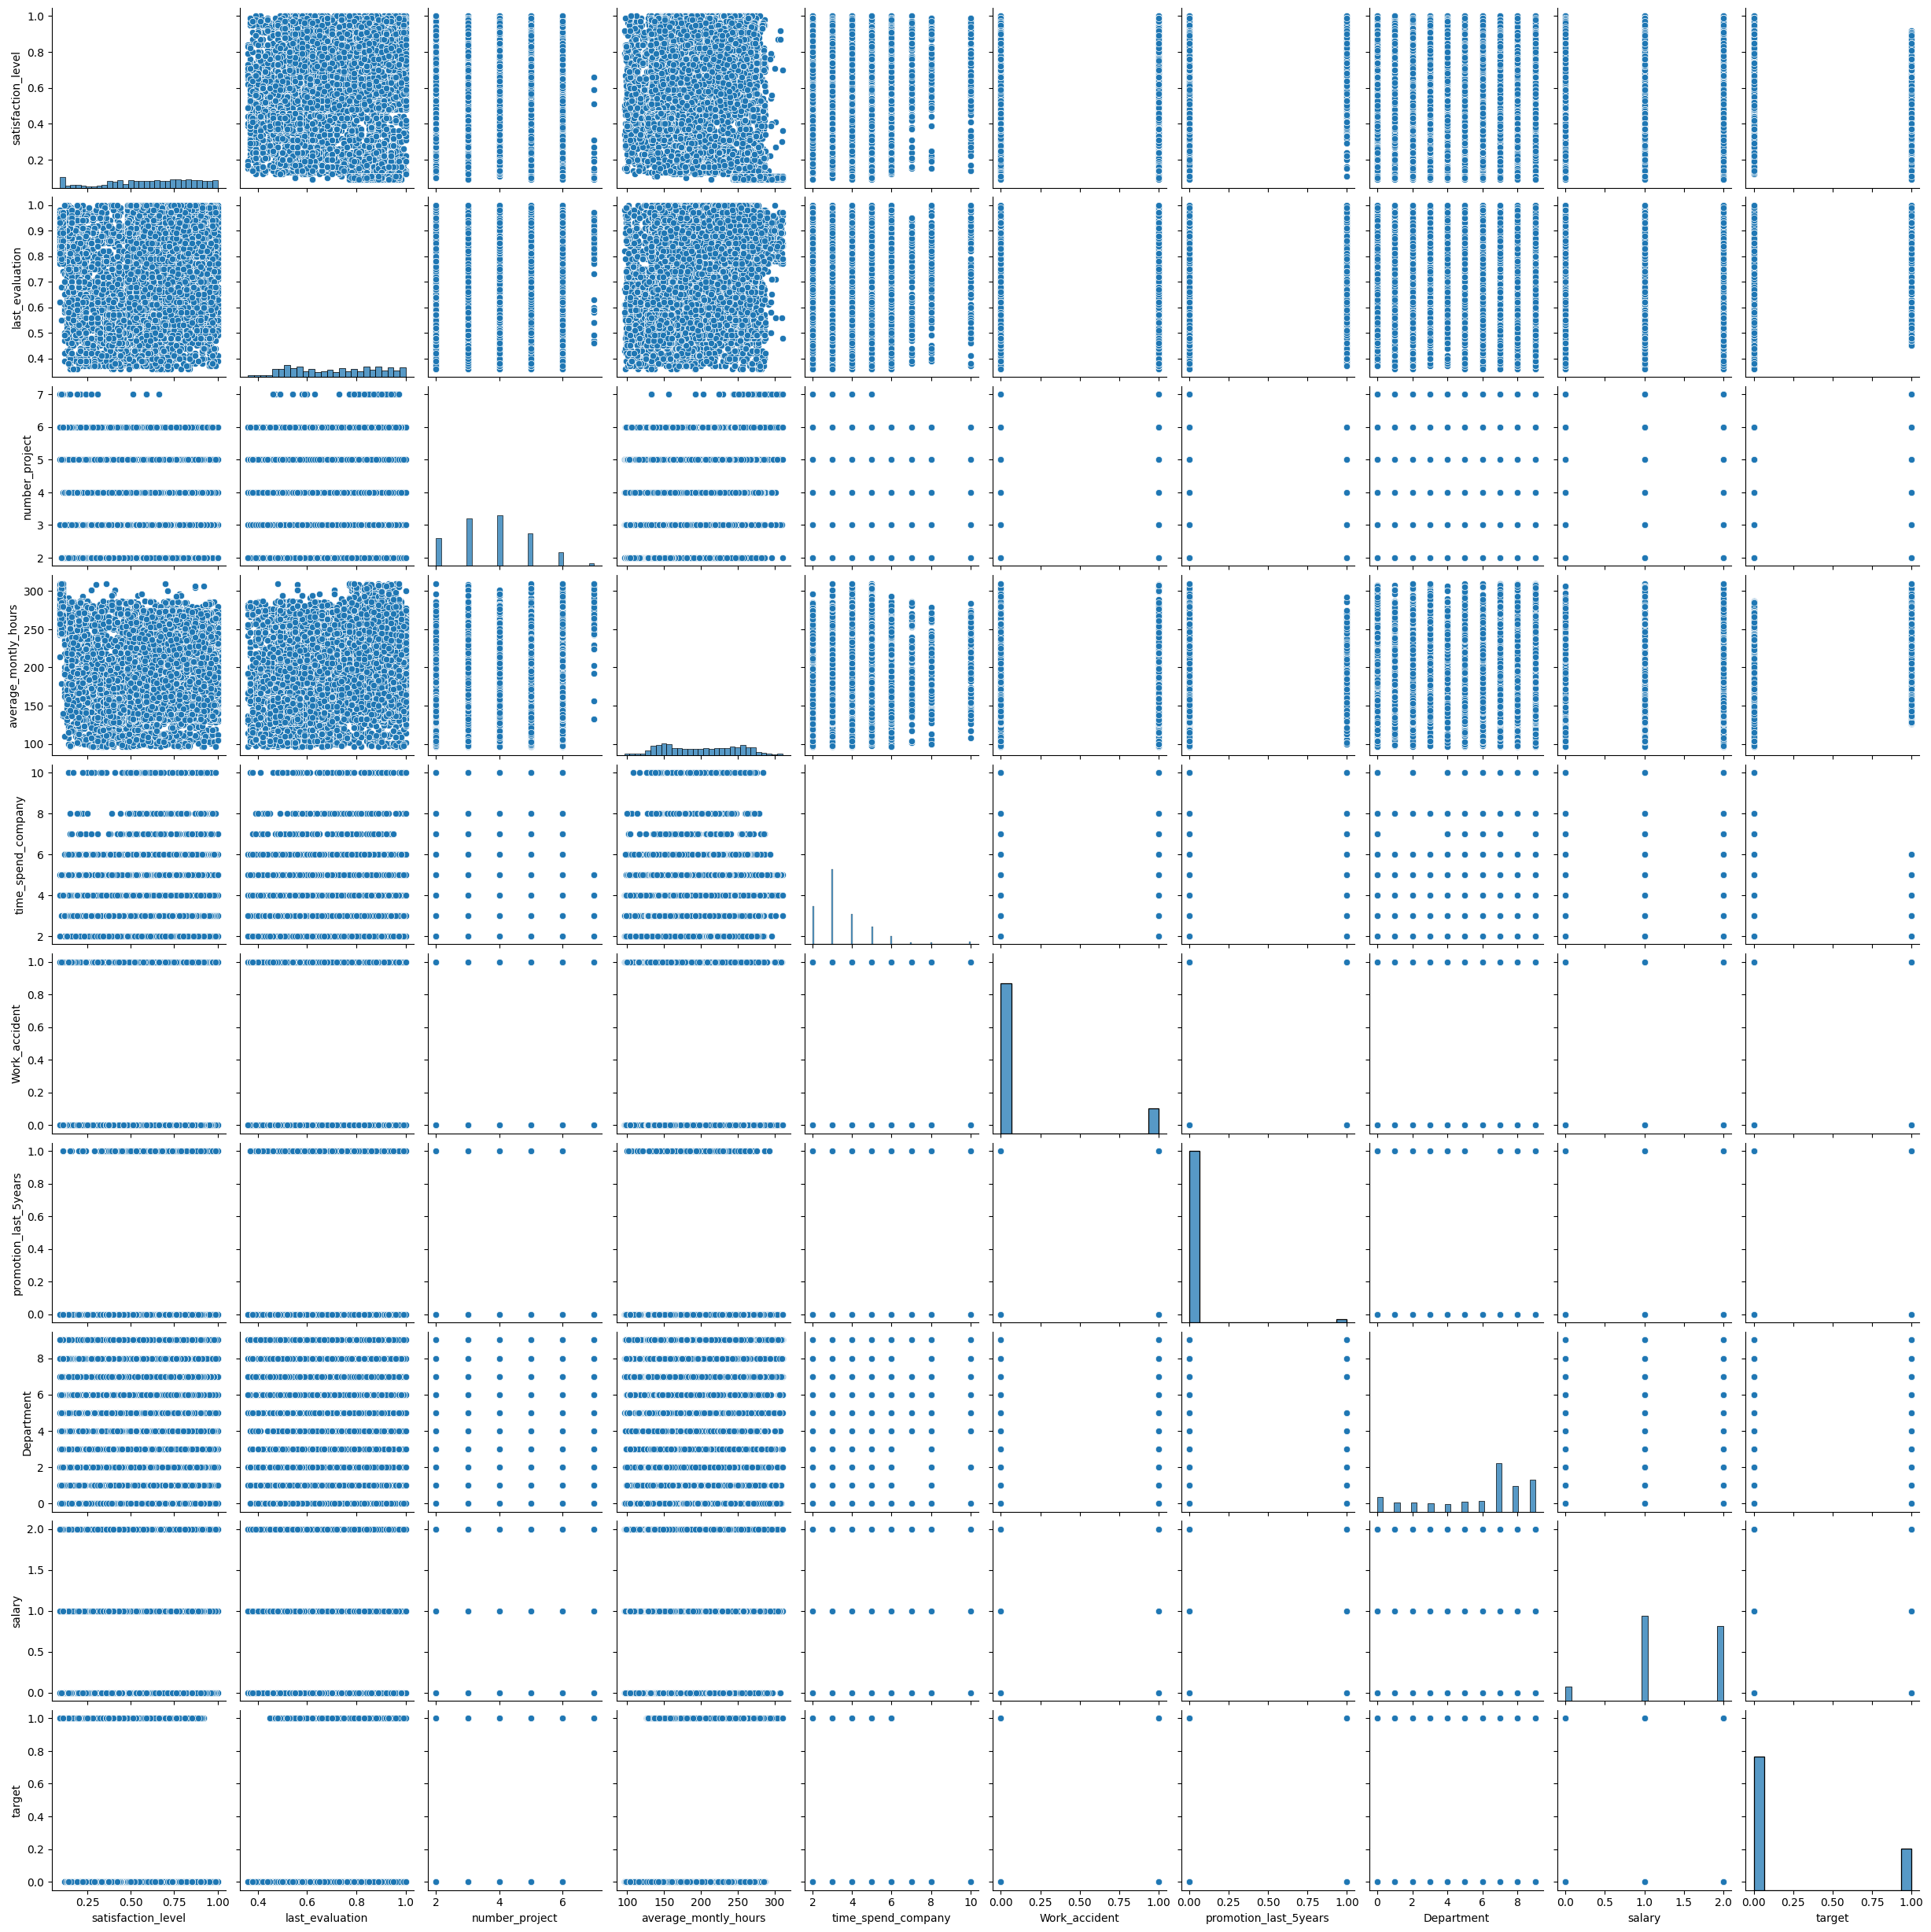

In [34]:
#Histogram
sns.pairplot(df1)

#There are too many instances in this data, a pairplot therefore is not effective way to visualize the relationship between the variables.

In [35]:
df1.groupby('target').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
target,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


- On average, employees who stayed had higher satisfaction_level than that of employees who left the company.
- Average working hours and number of projects of employees leaving company are higher than those who decided to stay.
- Employees who were promoted in the last 5 years were more likely to stay


<Axes: >

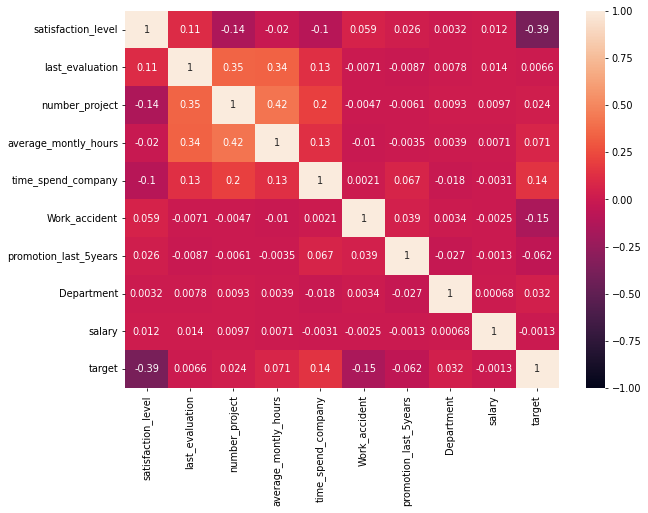

In [36]:
plt.figure(figsize = (10,7), dpi = 70)
sns.heatmap(df1.corr(), annot=True, vmin = -1, vmax = 1)

#After present the heatmap correlation, i realize that satisfaction_level, time_spend_company and work_accident have a relationship with target so i decided to use regression equation to check the coeficient of data

In [56]:
from sklearn.linear_model import LinearRegression

print(df1.columns)
# Create a linear regression object and fit the model to the data
check = [0,1,2,3,5,6]
X = df1.iloc[1:1000, check].values
y = df1.iloc[1:1000, 4]
model = LinearRegression().fit(X, y)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)




Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'target'],
      dtype='object')
Coefficients: [ 1.74801352  1.5609084   0.14395841  0.00322496  0.08065586 -0.23292347]
Intercept: 0.7533462564164366


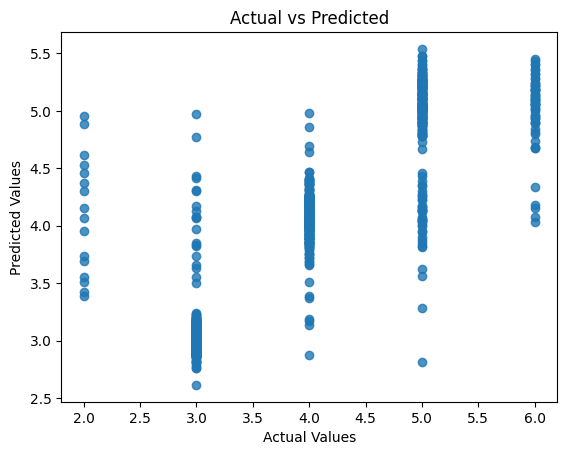

In [57]:



from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# X contains your input data, y contains your output (target) data
model = LinearRegression()
model.fit(X, y)

# Use the trained model to make predictions on your input data
y_pred = model.predict(X)



# Create a scatter plot of the actual versus predicted values
plt.scatter(y, y_pred, alpha=0.8)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


